#**Ch08. 텍스트분석**
- 텍스트 분류(Text Classification) : Text Categorization, 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법
- 감성 분석(Sentiment Analysis) : 텍스트에서 나타나는 감정/ 판단/ 믿음/ 의견/ 기분 등의 주관적인 요소를 분석하는 기법
- 텍스트 요약(Summarization) : 텍스느 내에서 중요한 주제나 중심 사상을 추출하는 기법, 토픽 모델링
- 텍스트 군집화(Clustering)와 유사도 측정 : 비슷한 유형의 문서에 대해 군집화를 수행하는 기법, 문서들간의 유사도를 측정해 비슷한 문서끼리 모으는 방법

##**01. 텍스트 분석 이해**
비정형 데이터인 텍스트를 분석하는 것



###**텍스트 분석 수행 프로세스**
1. **텍스트 사전 준비작업(텍스트 전처리)** : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어(word) 등의 토큰화 작업, 의미 없는 단어(stop word) 제거 작업, 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업을 수행하는 것
2. **피처 벡터화/추출** : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당, 대표적인 방법은 BOW와 Word2Vec이 있다.
  - Bow는 대표적으로 Count 기반과 TF-IDF기반 벡터화가 있음
3. **ML 모델 수립 및 학습/예측/평가** : 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행


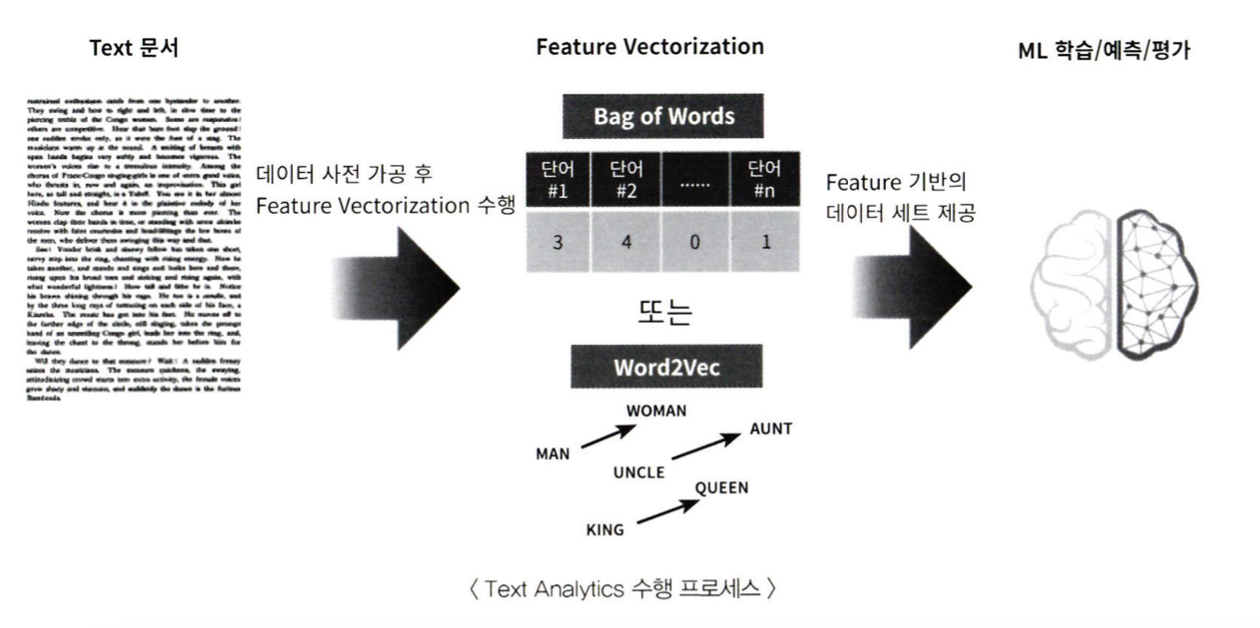

###**파이썬 기반의 NLP, 텍스트 분석 패키지**
- NLTK(Natural Language Toolkit for Python) : 파이썬의 가장 대표적인 NLP 패키지
  - 방대한 데이터 세트와 서브 모듈, NLP의 거의 모든 영역을 커버
  - 수행 속도 측면에서 아쉬움, 실제 대량 데이터 기반에서는 제대로 활용되지 못함

- Gensim : 토픽 모델링 분야에서 두각을 나타내는 패키지
  - Word2Vec 구현
  - SpaCy와 함께 가장 많이 사용되는 NLP 패키지

- SpaCy : 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지


사이킷런 : 특화된 라이브러리는 없지만 일정 수준 가공하고 피처 처리하기 위한 편리한 기능 가짐
  - NLP 전용 패키지와 함께 사용

##**02. 텍스트 사전 준비 작업(텍스트 전처리) -  텍스트 정규화**
- 클렌징
- 토큰화
- 필터링/스톱 워드 제거/철자 수정
- Stemmeing
- Lemmatization

###**클렌징**
텍스트에서 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업 ex) HTML, XML태그나 특정 기호

####**텍스트 토큰화**


#####**문장 토큰화**
- 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적
- 정규 표현식에 따른 문장 토큰화도 가능
- NLTK - `sent_tokenize()`
  - `nltk.download('punkt')` : 마침표, 개행 문자 등의 데이터 세트를 다운로드

In [ ]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room.\n You can see it out your window or on your television.\nYou feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text_sample)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


#####**단어 토큰화**
문장을 단어로 토큰화
- 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리, 정규 표현식을 이용해 토큰화
- 단어의 순서가 중요하지 않은 경우 단어 토큰화 사용
- NLTK - `word_tokenize()`

In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words),len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


- `sent_tokenize`, `word_tokenize` 조합해 문서에 대해 모든 단어를 토큰화


In [ ]:
from nltk import word_tokenize, sent_tokenize

#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

  #문장별로 분리 토큰
  sentences = sent_tokenize(text)
  #분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentences in sentences]
  return word_tokens

#여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']]


- 문장을 단어별로 하나씩 토큰화하는 경우 문맥적인 의미가 무시됨 -> n-gram으로 개선
  - `n-gram`: 연속된 n개의 단어를 하나의 토큰화 단위로 분리해내는 것
  - n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화 수행


###**스톱 워드 제거**
스톱 워드(Stop word) : 분석에 큰 의미가 없는 단어 지칭 ex) is, the, a, will
  - 문장을 구성하는 필수 문법 요소이지만 문맥적으로 큰 의미가 없는 단어
  - 문법적인 특성으로 인해 특히 빈번하게 텍스트에 나타남, 사전 제거 필요
  - 언어별로 스톱워드 목록화되어있음

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens=[]
#위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱워드를 제거하는 반복문

for sentence in word_tokens:
  filtered_words=[]
  #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence :
    #소문자로 모두 변환
    word = word.lower()
    #토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords :
      filtered_words.append(word)

  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.']]


###**Stemming 과 Lemmatization**
많은 언어에서 문법적인 요소에 따라 단어가 다양하게 변화
- 과거/현재, 3인칭 단수 여부, 진행형 등
- 문법적/의미적으로 변화하는 단어의 원형을 찾는 것

**Stemming** : 원형 단어로 변환 시 일반적인 방법 또는 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출

**Lemmatization** : 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 추출
  - Stemming보다 정교하며 변환에 더 오랜 시간이 걸림

NLTK Stemmer
- Stemmer : Porter, Lancaster, Snowball Stemmer
- Lemmatization : WordNetLemmatizer




In [ ]:
#Stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


- work : 진행형(working), 3인칭 단수(works), 과거형(worked)
  - 단순한 변화이므로 원형 단어로 work 제대로 인식
- amuse : amus 에 ing, s, ed 가 붙음
  - 정확한 단어인 amuse 가 아닌 amus를 원형으로 인식
- happy, fancy : 형용사의 비교형, 최상급형
  - 원형 단어에서 철자가 다른 어근 단어로 인식하는 경우 발생

In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma=WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


- 보다 정확한 원형 단어 추출을 위해 단어의 품사를 입력
  - `동사` : 'v', `형용사` : 'a'

##**03. Bag of Words - BOW**
Bag of Words : 문서가 가지는 모든 단어(words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도값을 부여해 피처 값을 추출하는 모델
  - 문서 내 모든 단어를 한꺼번에 봉투(Bag) 안에 넣은 뒤 흔들어서 섞는다는 의미

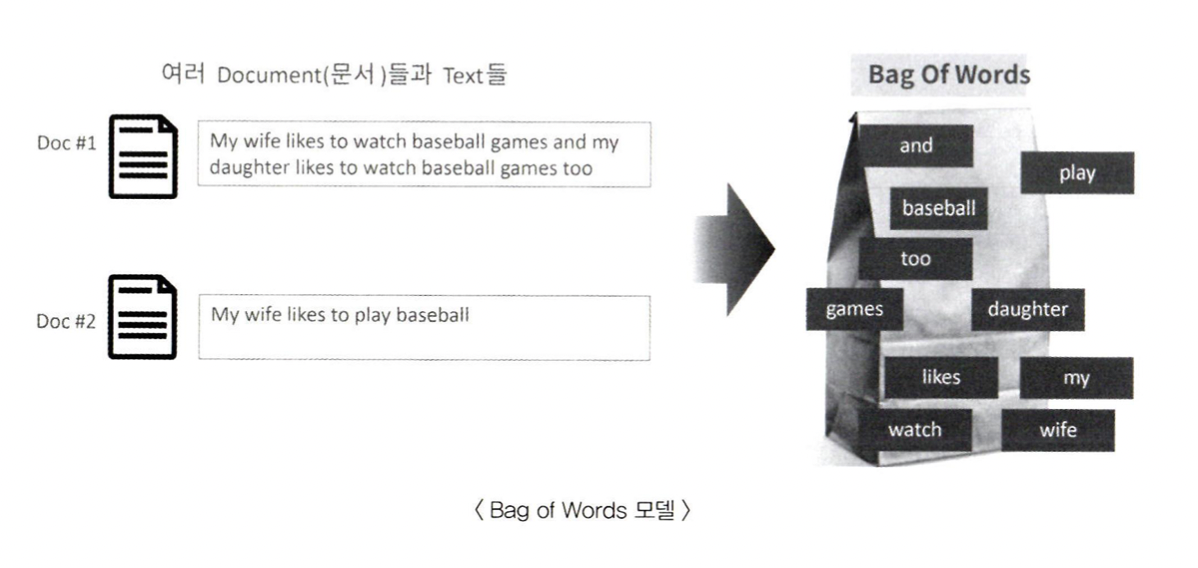

- 장점 : 빠르고 쉬운 구축
- 단점
  - 문맥 의미(Semantic Context) 반영 부족 : 단어의 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시됨
  - 희소 행렬 문제(희소성, 희소 행렬) : 매우 많은 단어가 칼럼으로 만들어진다.
    - 문서마다 서로 다른 단어로 구성되기에 단어가 문서마다 나타나지 않는 경우가 훨씬 더 많음
    - 희소 행렬 : 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬
    - ML 알고리즘의 수행 시간과 예측 성능을 떨어뜨리므로 희소 행렬을 위한 특별한 기법이 마련됨

###**BOW 피처 벡터화**
텍스트는 특정 의미를 가지느 숫자형 값인 벡터 값으로 변환해야 함 : 피처 벡터화
- 카운트 기반의 벡터화
- TF - IDF(Term Frequency - Inverse Document Frequency)
  - 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여


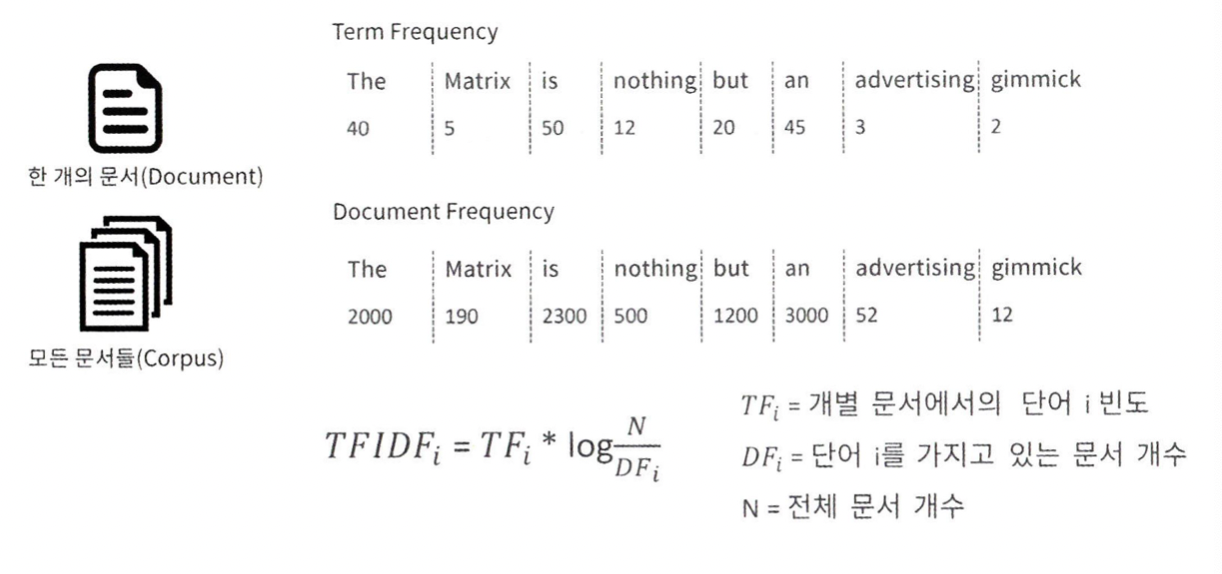

###**사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer**

CountVectorizer : 카운트 기반의 벡터화를 구현한 클래스


|파라미터명|파라미터설명|
|--|--|
|max_df|전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터|
|min_df|전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터|
|max_features|추출하는 피처의 개수를 제한하며 정수로 값을 지정|
|stop_words|'english'로 지정하면 영어의 스톱 워드로 지정된 단어를 추출에서 제외|
|n_gram_range|BoW 모델의 단어 순서를 보강하기 위한 범위를 설정|
|analyzer|피처 추출을 수행한 단위를 지정, 디폴트='word'|
|token_pattern|토큰화를 수행하는 정규 표현식 패턴을 지정, 디폴트='\b\w\w+\b'|
|tokenizer|토큰화를 별도의 함수로 이용시 적용|



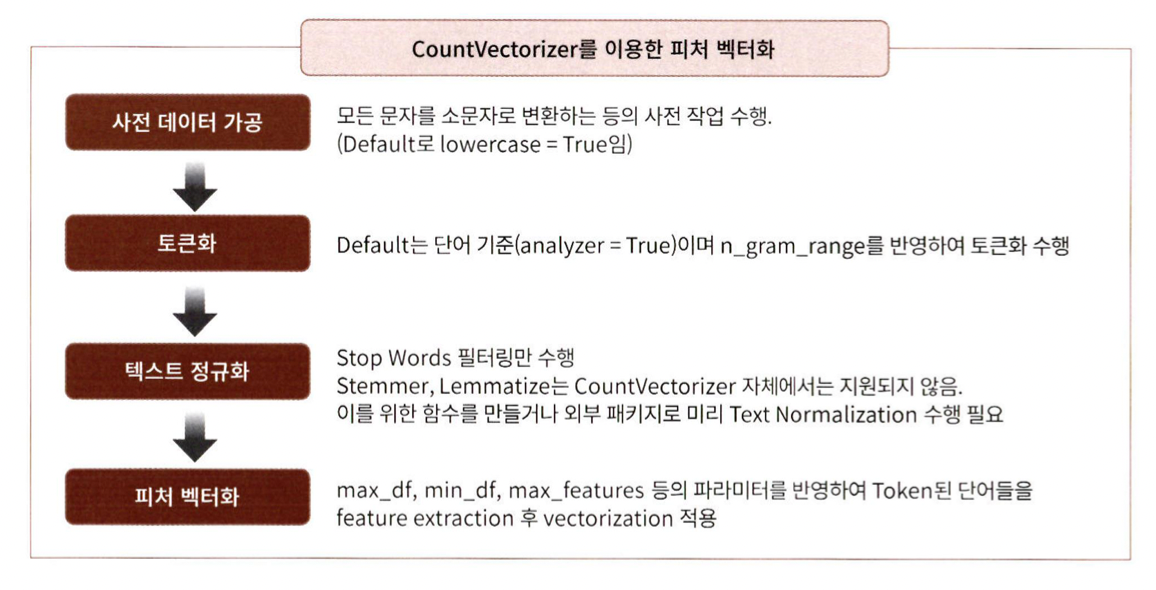

###**BOW 벡터화를 위한 희소 행렬**
- 사이킷런의 CountVectorizer/TfidfVectorizer를 이용해 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형태의 희소 행렬을 반환
- 희소 행렬은 불필요한 0 값이 메모리 공간에 할당되어 메모리 공간이 많이 필요함 -> 적은 메모리를 차지할 수 있도록 변환
- COO, CSR 형식

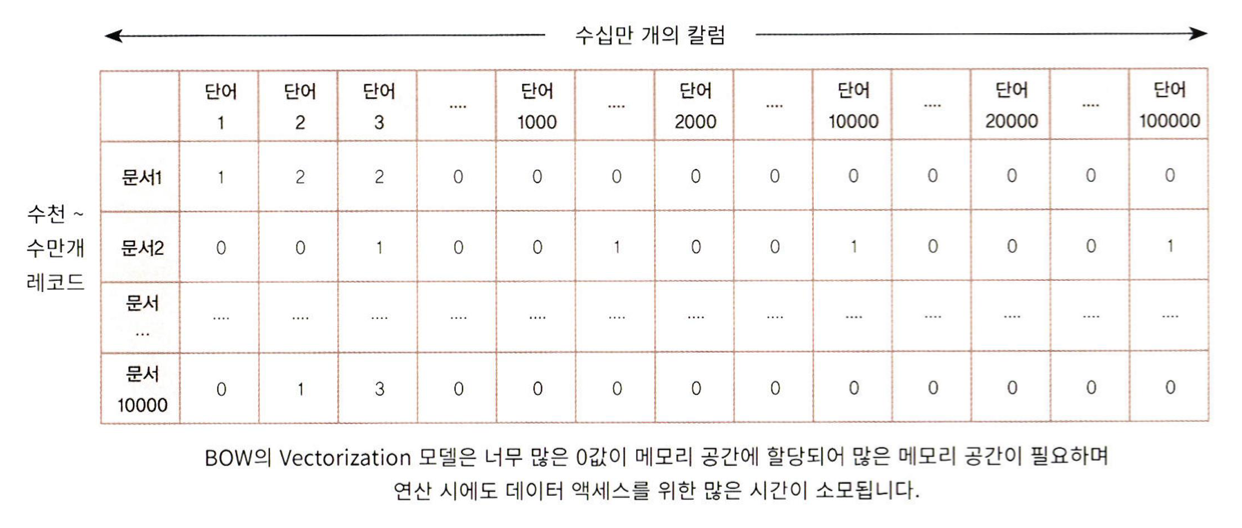

###**희소 행렬 - COO 형식**
COO(Coordinate : 좌표)형식 : 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

In [ ]:
import numpy as np
dense = np.array([[3,0,1],[0,2,0]])

In [ ]:
from scipy import sparse

#0이 아닌 데이터 추출
data = np.array([3,1,2])

#행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

#sparse 패키지의 coo_matrix 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [ ]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

###**희소 행렬 - CSR 형식**
CSR(Compressed Sparse Row) : COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식
- 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도 위치 배열로 가지는 변환 방식

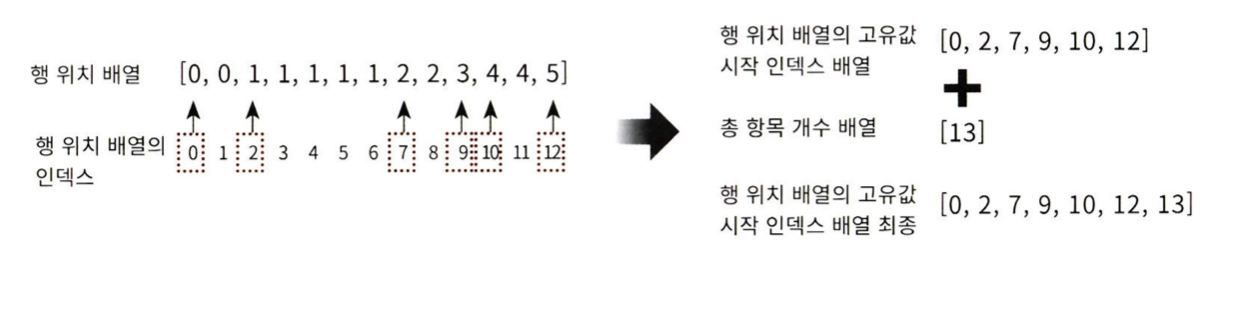

In [ ]:

from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

#0이 아닌 데이터 추출
data2=np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

#행 위치와 열 위치를 각각 array로 생성
row_pos=np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos=np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

#COO 형식으로 변환
sparse_coo=sparse.coo_matrix((data2, (row_pos, col_pos)))

#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성 + 맨 끝에는 총 데이터 수
row_pos_ind=np.array([0,2,7,9,10,12,13])

#CSR 형식으로 변환
sparse_csr=sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
#밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성
dense3=np.array([[0,0,1,0,0,5],
                 [1,4,0,3,2,5],
                 [0,6,0,3,0,0],
                 [2,0,0,0,0,0],
                 [0,0,0,7,0,8],
                 [1,0,0,0,0,0]])

coo=sparse.coo_matrix(dense3)
csr=sparse.csr_matrix(dense3)

##**04. 텍스트 분류 실습 - 20 뉴스그룹 분류**
**텍스트 분류** : 특정 문서의 분류를 학습 데이터를 통해 학습해 모델을 생성한 뒤 학습 모델을 이용해 다른 문서의 분류를 예측하는 것

fetch_20newsgroups() API
- 텍스트를 피처 벡터화로 변환하면 희소 행렬 형태가 됨

- 희소 행렬 분류를 효과적으로 처리할 수 있는 알고리즘
  - 로지스틱 회귀, 선형 서포트 벡터 머신, 나이브 베이즈 등
- 텍스트 정규화 후 피처 벡터화(카운트 기반/TF-IDF)
- 학습/예측/평가

###**텍스트 정규화**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
news_data = fetch_20newsgroups(subset='all', random_state=156)

In [ ]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [ ]:
import pandas as pd
print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

- 뉴스그룹 기사의 내용, 뉴스그룹 제목, 작성자, 소속, 이메일 등 다양한 정보
- 내용을 제외한 다른 정보(헤더, 푸터 등)는 제거
  - 뉴스그룹 분류의 target 클래스 값과 유사한 데이터를 가지고 있는 경우가 많기 때문


In [ ]:
from sklearn.datasets import fetch_20newsgroups

# subset = 'train'으로 학습용 데이터만 추출, remove=('headers', 'footers', 'quotes') 로 내용만 추출
train_news = fetch_20newsgroups(subset = 'train', remove=('headers', 'footers', 'quotes'), random_state = 156)

X_train = train_news.data
y_train = train_news.target

#subset='test'으로 테스트 데이터만 추출, remove=('headers', 'footers', 'quotes') 로 내용만 추출
test_news = fetch_20newsgroups(subset = 'test', remove=('headers', 'footers', 'quotes'), random_state = 156)

X_test = train_news.data
y_test = train_news.target
print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data),len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기 7532


###**피처 벡터화 변환과 머신러닝 모델 학습/예측/평가**
학습데이터 : 11314개의 뉴스그룹 문서가 리스트 형태로 주어짐

테스트데이터 : 7532개의 문서가 리스트 형태로 주어짐

CountVectorizer : 학습 데이터의 텍스트를 피처 벡터화, 학습데이터로 fit() 수행된 객체로 테스트 데이터 변환(transform)
- 테스트 데이터의 피처 벡터화 시 fit_transform() 사용하면 안됨 : 학습 시 사용되는 피처 개수와 예측 시 사용할 피처 개수가 달라짐

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Count Vectorization으로 피처 벡터화 변환 수행.
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

#학습 데이터로 fit()된 CountVectorizer를 이용해 테스트 데이터를 피터 벡처화 변환 수행.
X_test_cnt_vect= cnt_vect.transform(X_test)

print('학습 데이터 텍스트의 countVectorizer shape:', X_train_cnt_vect.shape)

학습 데이터 텍스트의 countVectorizer shape: (11314, 101631)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#LogisticRegression을 이용해 학습/예측/평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
pred= lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression의 예측 정확도는 0.964


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF 벡터화를 적용해 학습 데이터 세트와 테스트 데이터 세트 변환
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

#LogisticRegression을 이용해 학습/예측/평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.907


- TF-IDF가 단순 카운트 기반보다 훨씬 높은 예측 정확도 제공
  - 문서 내에 텍스트가 많고 많은 문석를 가지는 텍스트 분석에서 카운트 벡터화보다는 TF-IDF벡터화가 좋은 예측결과 도출

텍스트 분석에서 머신러닝 모델 성능 향상하는 법
1. 최적의 ML 알고리즘 선택
2. 최상의 피처 전처리 수행

- 다양한 파라미터 적용해보기

In [ ]:
#stop words 필터링을 추가하고 ngram을 기본 (1,1)에서 (1,2)로 변경해 피처 벡터화 적용
tfidf_vect = TfidfVectorizer(stop_words = 'english', ngram_range=(1,2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.956


- GridSearchCV
  - C 파라미터만 변경

In [ ]:
from sklearn.model_selection import GridSearchCV

# 최적 C값 도출 튜닝 수행. CV는 3폴드 세트로 설정
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('Logistic Regression best C parameter :', grid_cv_lr.best_params_)

# 최적 C 값으로 학습된 grid_cv로 예측 및 정확도 평가
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression best C parameter : {'C': 10}
TF-IDF Logistic Regression의 예측 정확도는 0.973


- 로지스틱 회귀의 C가 10일 때 가장 좋은 예측 성능, 0.703으로 약간 향상된 성능수치

###**사이킷런 파이프라인(Pipeline)사용 및 GridSearchCV와의 결합**

Pipeline 클래스를 이용해 피처 벡터화, ML 알고리즘 학습/예측을 위한 코드 작성 한 번에 진행 가능
- 텍스트 기반의 피처 벡터화, 모든 전처리 작업과 Estimator 결합 가능
- 스케일링, 벡터 정규화, PCA 등의 변환 작업과 분류, 회귀 등의 Estimator 한 번에 결합



```
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english')), ('lr_clf', LogisticRegression(random_state=156))])

```



In [ ]:
from sklearn.pipeline import Pipeline

# TfidVectorizer 객체를 tfid_vect로, LogisticRegression 객체를 lr_clf로 생성하는 Pipeline 생성
pipeline=Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])

# 별도의 TfidVectorizer 객체의 fit(), transform()과 LogisticRegression의 fit(), predict()가 필요없음
# pipeline의 fit과 predict()만으로 한꺼번에 피처 벡터화와 ML 학습/예측이 가능
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:3f}'.format(accuracy_score(y_test, pred)))

GridSearchCV 클래스의 생성 파라미터로 Pipeline을 입력해 Pipeline 기반에서도 하이퍼파라미터 튜닝을 GridSearchCV 방식으로 수행할 수 있게 됨
- param_grid 하이퍼파라미터명이 객체 변수명과 결합되어 제공
- `tfidf_vect__ngram_range`
- Pipeline+GridSearch 적용하면 너무 많은 튜닝 시간이 소모됨

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 파라미터/하이퍼파라미터 이름과 값을 설정
params = {'tfidf_vect__ngram_range':[(1,1),(1,2),(1,3)],
         'tfidf_vect__max_df': [100,300,700],
         'lr_clf__C':[1,5,10]}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression의 예측 정확도는 {0:.3f}.format(accuracy_score(y_test,pred))')
